In [2]:
# Importing the packages
# For data manipulation and Numeric calculations
import pandas as pd
import numpy as np

# For Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# For Mathematical functions
import scipy.stats as stats
from scipy.stats import norm

# For changing folders within system
import os

Proportion of gunny bags have a breaking strength of less than 3.17 kg per sq cm : 0.11


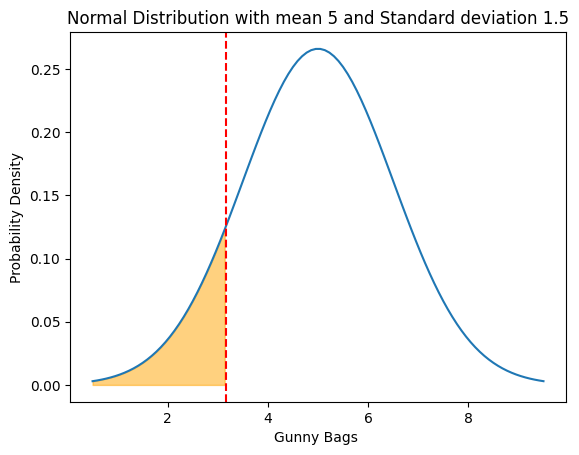

In [49]:
# Less Than Scenario
fig, ax = plt.subplots()

mean =5
std_dev =1.5

# Step-1 Getting the observations for the distribution

x = np.linspace(mean -3*std_dev, mean+3*std_dev, 100)
y = norm.pdf(x, loc =5, scale =1.5)

# Step-2 Plot the distribution with Labels

plt.plot(x,y)
plt.xlabel ('Gunny Bags ')
plt.ylabel ('Probability Density')
plt.title("Normal Distribution with mean 5 and Standard deviation 1.5")

# Step 3 Plotting a vertical line & filling the area

plt.axvline(3.17, c ='r', linestyle ='--')
ax.fill_between(x,y, where =(x<=3.17), alpha =0.5, color ='orange')

# Show the plot and Proportion

proporation  = stats.norm.cdf(3.17,loc =5, scale =1.5)
print("Proportion of gunny bags have a breaking strength of less than 3.17 kg per sq cm : %1.2f" %proporation )
plt.show()

part 2 2.2

Proportion of gunny bags have a breaking strength of at least 3.6 kg per sq cm: 0.82


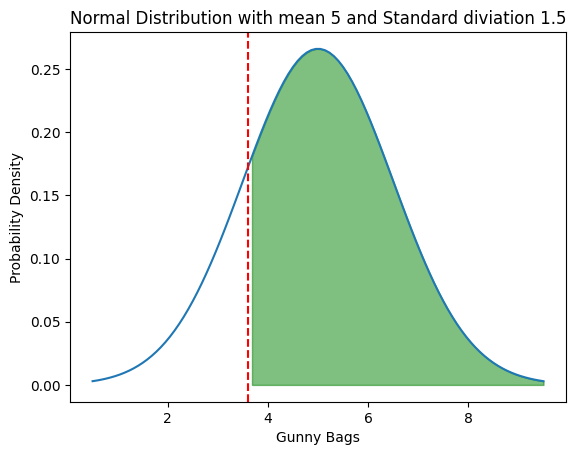

In [68]:
# Greater Than Scenario
fig, ax = plt.subplots()

mean =5
std_dev =1.5

# Step-1 Getting the observations for the distribution

x = np.linspace(mean -3*std_dev, mean+3*std_dev, 100)
y = norm.pdf(x, loc =5, scale =1.5)

# Step-2 Plot the distribution with Labels

plt.plot(x,y)
plt.xlabel ('Gunny Bags')
plt.ylabel ('Probability Density')
plt.title("Normal Distribution with mean 5 and Standard diviation 1.5")

# Step 3 Plotting a vertical line & filling the area

plt.axvline(3.6, c ='r', linestyle ='--')
ax.fill_between(x,y, where =(x>=3.6), alpha =0.5, color ='green')

# Show the plot and Proportion

proporation  = 1-stats.norm.cdf(3.6,loc =5, scale =1.5)
print("Proportion of gunny bags have a breaking strength of at least 3.6 kg per sq cm: %1.2f" %proporation )
plt.show()

Proportion of the gunny bags have a breaking strength between 5 and 5.5 kg per sq cm.: 0.13


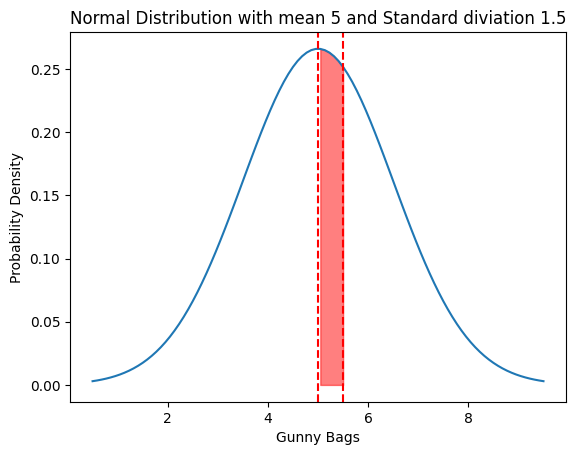

In [51]:
#In between scenario
fig, ax = plt.subplots()

mean =5
std_dev =1.5

# Step-1 Getting the observations for the distribution

x = np.linspace(mean -3*std_dev, mean+3*std_dev, 100)
y = norm.pdf(x, loc =5, scale =1.5)

# Step-2 Plot the distribution with Labels

plt.plot(x,y)
plt.xlabel ('Gunny Bags')
plt.ylabel ('Probability Density')
plt.title("Normal Distribution with mean 5 and Standard diviation 1.5")

# Step 3 Plotting a vertical line & filling the area

plt.axvline(5, c ='r', linestyle ='--')
plt.axvline(5.5, c ='r', linestyle ='--')
ax.fill_between(x,y, where =(x>=5) & (x<=5.5), alpha =0.5, color ='red')

# Show the plot and Proportion

proporation  = stats.norm.cdf(5.5,loc =5, scale =1.5)-stats.norm.cdf(5,loc =5, scale =1.5)
print("Proportion of the gunny bags have a breaking strength between 5 and 5.5 kg per sq cm.: %1.2f" %proporation )
plt.show()

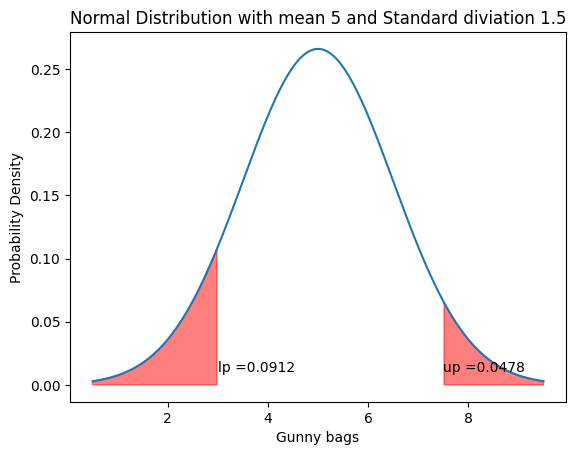

Proportion of the gunny bags have a breaking strength NOT between  3 and 7.5 yrs: 0.1390


In [52]:
# Not in between Scenario

# Joining all the plots
fig,ax = plt.subplots()

mu =5
sigma =1.5

# Set low and upper limits
lower =3
upper =7.5

# Caluclate the z -scores for lower and upper limits

z_lower = (lower -mu)/sigma
z_upper = (upper-mu)/sigma

# Calculate poportions using the normal distribution function
lower_proportion = stats.norm.cdf(z_lower)
upper_proportion = stats.norm.sf(z_upper)
proportion = lower_proportion+upper_proportion

# Plot the distribution

x = np.linspace(mu-3*sigma,mu+3*sigma, 400)
y =stats.norm.pdf(x,mu,sigma)
ax.plot(x,y)
ax.fill_between(x,y, where =(x<lower)|(x>upper), alpha =0.5, color ='red')

# Set title and labels

plt.xlabel ('Gunny bags')
plt.ylabel ('Probability Density')
plt.title("Normal Distribution with mean 5 and Standard diviation 1.5")

# Add Text
ax.text(3,0.01, "lp =%1.4f" %lower_proportion, fontsize =10 )
ax.text(7.5,0.01, "up =%1.4f" %upper_proportion, fontsize =10 )
# Show the plot and print the proportion
plt.show()
print(f"Proportion of the gunny bags have a breaking strength NOT between  {lower} and {upper} yrs: {proportion:.4f}")



PROBLEM 3



In [53]:
# Get the Data

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [54]:
path="/content/drive/MyDrive/Statistics/Zingaro_Company.csv"

In [55]:
df=pd.read_csv(path)

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unpolished            75 non-null     float64
 1   Treated and Polished  75 non-null     float64
dtypes: float64(2)
memory usage: 1.3 KB


In [57]:
df.head()

,Unpolished,Treated and Polished
0,164.481713,133.209393
1,154.307045,138.482771
2,129.861048,159.665201
3,159.096184,145.663528
4,135.256748,136.789227


In [58]:
df.tail()

,Unpolished,Treated and Polished
70,123.067611,142.293544
71,171.822218,140.124092
72,88.135994,141.393091
73,145.150397,131.370530
74,170.854823,144.502647


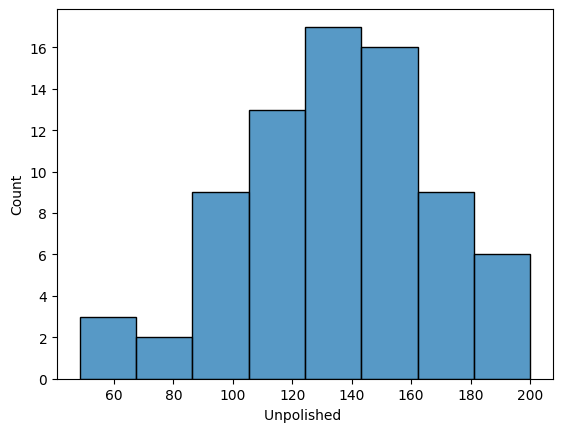

In [81]:
sns.histplot(x ='Unpolished ', data =df);

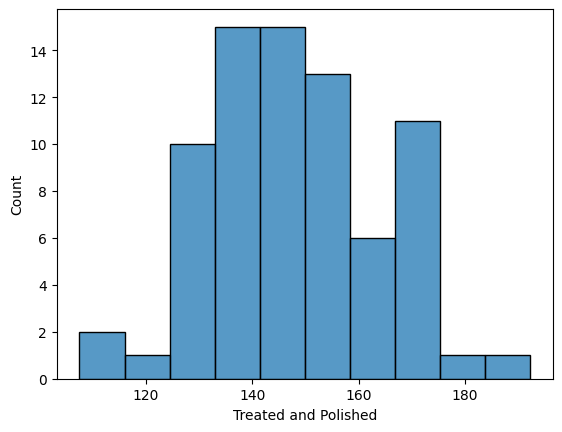

In [60]:
sns.histplot(x ='Treated and Polished', data =df);

In [63]:
from scipy.stats import ttest_1samp,ttest_ind,ttest_rel, chi2_contingency

3.2 Is the mean hardness of the polished and unpolished stones the same

In [64]:
# Can you validate if compant average queries is same for both the companies
# H0 - mean hardness of the polished  = mean hardness of the unpolished
# H1 - mean hardness of the polished != mean hardness of the unpolished

In [66]:
alpha = 0.05

t_statistic, p_value = stats.ttest_ind(df['Unpolished '],df['Treated and Polished'], equal_var=False, alternative='two-sided')

print(f"The test statistic is {t_statistic:.3f}")
print(f"The p-value is {p_value:.3f}")

The test statistic is -3.242
The p-value is 0.002


p value is less than 0.05 we reject the null hypothesis. So mean hardness of unpolished and polished are not same.

In [72]:
df['Unpolished '].mean()

134.11052653373332

In [73]:
df['Treated and Polished'].mean()

147.78811718133335

3.1 Zingaro has reason to believe that the unpolished stones may not be suitable for printing. Do you think Zingaro is justified in thinking so?

In [114]:
#H0:stone found to be of adequate hardness >=150
#H1:Unpolished stone hardness is not suitable for printing <150

ttest_1samp(df['Unpolished '],150)


TtestResult(statistic=-4.164629601426757, pvalue=8.342573994839304e-05, df=74)

In [82]:
for i in df.columns:
  print(i,df[i].isnull().sum())

Unpolished  0
Treated and Polished 0


Question 4

4.1

In [12]:
# Get the Data

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [13]:
path_excel="/content/drive/MyDrive/Statistics/Dental Hardness data1.xlsx"

In [14]:
cf_excel=pd.read_excel(path_excel)

In [15]:
cf_excel.head()

,Dentist,Method,Alloy,Temp,Response
0,1,1,1,1500,813
1,1,1,1,1600,792
2,1,1,1,1700,792
3,1,1,2,1500,907
4,1,1,2,1600,792


In [16]:
cf_excel.tail()

,Dentist,Method,Alloy,Temp,Response
85,5,3,1,1600,483
86,5,3,1,1700,405
87,5,3,2,1500,536
88,5,3,2,1600,405
89,5,3,2,1700,312


In [17]:
cf_excel.describe().T

,count,mean,std,min,25%,50%,75%,max
Dentist,90.0,3.000000,1.422136,1.0,2.0,3.0,4.0,5.0
Method,90.0,2.000000,0.821071,1.0,1.0,2.0,3.0,3.0
Alloy,90.0,1.500000,0.502801,1.0,1.0,1.5,2.0,2.0
Temp,90.0,1600.000000,82.107083,1500.0,1500.0,1600.0,1700.0,1700.0
Response,90.0,741.777778,145.767845,289.0,698.0,767.0,824.0,1115.0


In [18]:
cf_excel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Dentist   90 non-null     int64
 1   Method    90 non-null     int64
 2   Alloy     90 non-null     int64
 3   Temp      90 non-null     int64
 4   Response  90 non-null     int64
dtypes: int64(5)
memory usage: 3.6 KB


In [19]:
for i in cf_excel.columns:
  print(i,cf_excel[i].isnull().sum())

Dentist 0
Method 0
Alloy 0
Temp 0
Response 0


#Test for normality

#Null hypothesis:: The given observation is normally distributed
#Alternative hypothesis: The given observation is not normally distributed

In [20]:
Alloy_1 = cf_excel[cf_excel['Alloy'] ==1][['Dentist', 'Temp', 'Response', 'Method']]
Alloy_2 = cf_excel[cf_excel['Alloy'] ==2][['Dentist', 'Temp', 'Response', 'Method']]


In [21]:
print(stats.shapiro([Alloy_1]))
print(stats.shapiro([Alloy_2]))


ShapiroResult(statistic=0.7674716114997864, pvalue=1.3196455680866779e-15)
ShapiroResult(statistic=0.7729496359825134, pvalue=2.042128461436101e-15)


P value is less than 0.05 we are still proceeding with ANOVA **Test**

In [29]:
from warnings import filterwarnings
filterwarnings("ignore")


In [34]:
Dentist_1 = cf_excel[cf_excel['Dentist'] ==1][['Alloy', 'Temp', 'Response', 'Method']]
Dentist_2 = cf_excel[cf_excel['Dentist'] ==2][['Alloy', 'Temp', 'Response', 'Method']]
Dentist_3 = cf_excel[cf_excel['Dentist'] ==3][['Alloy', 'Temp', 'Response', 'Method']]
Dentist_4 = cf_excel[cf_excel['Dentist'] ==4][['Alloy', 'Temp', 'Response', 'Method']]

In [35]:
print(stats.shapiro([Dentist_1]))
print(stats.shapiro([Dentist_2]))
print(stats.shapiro([Dentist_3]))
print(stats.shapiro([Dentist_4]))

ShapiroResult(statistic=0.7741794586181641, pvalue=3.6831273586557245e-09)
ShapiroResult(statistic=0.7735344767570496, pvalue=3.549490479315409e-09)
ShapiroResult(statistic=0.7705162763595581, pvalue=2.988440606088716e-09)
ShapiroResult(statistic=0.7672054767608643, pvalue=2.4786037666757466e-09)


In [36]:
Method_1 = cf_excel[cf_excel['Method'] ==1][['Alloy', 'Temp', 'Response', 'Dentist']]
Method_2 = cf_excel[cf_excel['Method'] ==2][['Alloy', 'Temp', 'Response', 'Dentist']]
Method_3 = cf_excel[cf_excel['Method'] ==3][['Alloy', 'Temp', 'Response', 'Dentist']]


In [37]:
print(stats.shapiro([Method_1]))
print(stats.shapiro([Method_2]))
print(stats.shapiro([Method_3]))

ShapiroResult(statistic=0.7740979194641113, pvalue=2.6304073936361805e-12)
ShapiroResult(statistic=0.7745263576507568, pvalue=2.7103042032905478e-12)
ShapiroResult(statistic=0.7585681676864624, pvalue=9.120459379050039e-13)


In [38]:
Response_1 = cf_excel[cf_excel['Response'] ==1][['Alloy', 'Temp', 'Method', 'Dentist']]
Response_2 = cf_excel[cf_excel['Response'] ==2][['Alloy', 'Temp', 'Method', 'Dentist']]
Response_3 = cf_excel[cf_excel['Response'] ==3][['Alloy', 'Temp', 'Method', 'Dentist']]

Levene's Test ------------Computes homogenity

H0::The variance in dataset is same
H1: The variance in given dataset is different


In [ ]:
ValueError: Samples must be one-dimensional.

In [70]:
import statsmodels.api as sm

In [71]:
from statsmodels.formula.api import ols

In [72]:
formula = 'Response~C(Dentist)'

In [28]:
formula = 'Response~C(Method)'
model = ols(formula, Alloy_1).fit()

In [ ]:
#Anderson Darling Test (AD -Test - to CHECK THE NORMALITY)

print(stats.anderson(Alloy_1, dist ='norm'))
print(stats.anderson(Alloy_2, dist ='norm'))

In [53]:
formula = 'Response ~ C(Dentist)'
model = ols(formula,Alloy_1).fit()
anova_table_1 = sm.stats.anova_lm(model_1, typ=2)
print(anova_table_1 )

                   sum_sq    df         F    PR(>F)
C(Dentist)   30337.866667   4.0  1.016625  0.417813
Residual    186510.833333  25.0       NaN       NaN


In [81]:
formula = 'Response ~ C(Dentist)'
model = ols(formula,Alloy_2).fit()
anova_table_1 = sm.stats.anova_lm(model_1, typ=2)
print(anova_table_1 )

                   sum_sq    df         F    PR(>F)
C(Dentist)  106683.688889   4.0  2.591255  0.051875
C(Method)   148472.177778   2.0  7.212522  0.002211
Residual    391121.377778  38.0       NaN       NaN


In [54]:
formula = 'Response ~ C(Method)'
model = ols(formula, Alloy_1).fit()
anova_table_1 = sm.stats.anova_lm(model_1, typ=2)
print(anova_table_1)

                   sum_sq    df         F    PR(>F)
C(Dentist)   30337.866667   4.0  1.016625  0.417813
Residual    186510.833333  25.0       NaN       NaN


In [80]:
formula = 'Response~C(Dentist) +C(Method)'
model_1= ols(formula, Alloy_1).fit()
model_2 = ols(formula, Alloy_2).fit()
Formula = 'Response~C(Dentist) +C(Method)+C(Dentist):C(Method)'
model_1 = ols(formula, Alloy_1).fit()
model_2 = ols(formula, Alloy_2).fit()
anova_table_1 = sm.stats.anova_lm(model_1, typ=2)
print(anova_table_1)


                   sum_sq    df         F    PR(>F)
C(Dentist)  106683.688889   4.0  2.591255  0.051875
C(Method)   148472.177778   2.0  7.212522  0.002211
Residual    391121.377778  38.0       NaN       NaN


In [79]:
Formula = 'Response~C(Dentist) +c(Method)+C(Dentist):c(Method)'
model = ols(formula, Alloy_2).fit()
anova_table_1 = sm.stats.anova_lm(model_1, typ=2)
print(anova_table_1)

                   sum_sq    df         F    PR(>F)
C(Dentist)  106683.688889   4.0  2.591255  0.051875
C(Method)   148472.177778   2.0  7.212522  0.002211
Residual    391121.377778  38.0       NaN       NaN


In [ ]:
#4.4

In [64]:
formula = 'Response ~ C(Dentist)+C(Method)+C(Dentist):C(Method)'
model = ols(formula, Alloy_1).fit()
anova_table_1 = sm.stats.anova_lm(model_1, typ=2)
print(anova_table_1)

                   sum_sq    df         F    PR(>F)
C(Dentist)   30337.866667   4.0  1.016625  0.417813
Residual    186510.833333  25.0       NaN       NaN


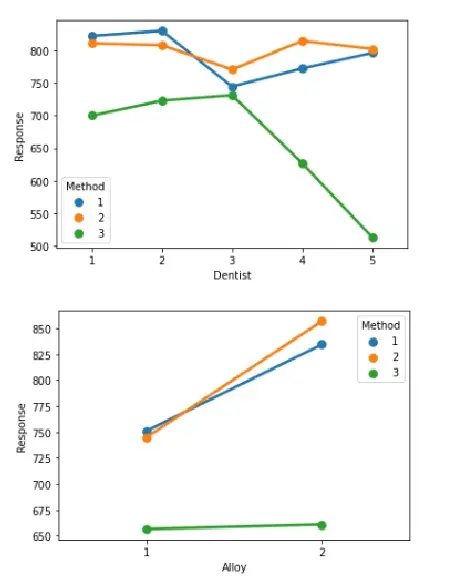